In [1]:
# 代码自动完成提示 tab 键
%config IPCompleter.greedy=True

# 一个 cell 可以多行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 


In [2]:
import pandas as pd
from datetime import datetime
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import cm
import mpl_toolkits.mplot3d as p3d

<Figure size 432x288 with 0 Axes>

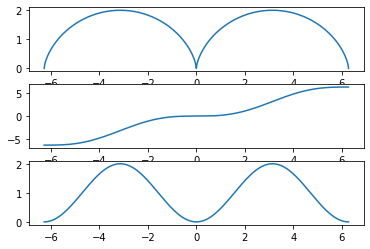

In [24]:
# 1. paramatric equation
# x, y 都是 t 的函数
t = np.linspace(-2 * np.pi, 2 * np.pi, 512, endpoint=True)  

plt.figure()
# 位移
x = t - np.sin(t)
y = 1 - np.cos(t)
plt.subplot(311)
plt.plot(x, y)
# 在 (0, 0) 斜率是无穷大，因为泰勒展开(三阶) y/x = 3/t, 在 t 趋于 0 时，趋于无穷大

plt.subplot(312)
plt.plot(t, x)

plt.subplot(313)
plt.plot(t, y)
# 随着时间滚动，x 持续增大，y 则是周期性

<Figure size 432x288 with 0 Axes>

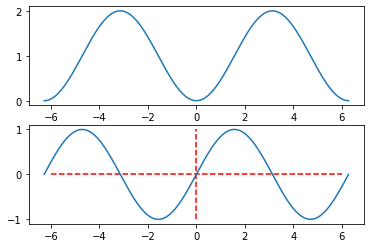

In [27]:
# 速度
plt.figure()
x_prim = 1 - np.cos(t)
y_prim = np.sin(t)

plt.subplot(211)
plt.plot(t, x_prim)

plt.subplot(212)
plt.plot(t, y_prim)
plt.hlines(0, -6, 6, colors = "r", linestyles = "dashed")
plt.vlines(0, -1, 1, colors = "r", linestyles = "dashed")


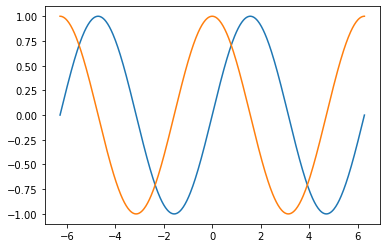

In [28]:
# 加速度
x_acc = np.sin(t)
y_acc = np.cos(t)
plt.plot(t, x_acc)
plt.plot(t, y_acc)


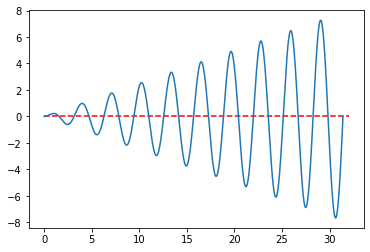

In [32]:
# 2. 共振 resonance

# 2.1 按公式算
t = np.linspace(0, 10 * np.pi, 5120, endpoint=True)  

omega = 2
y = t / (2 * omega) * np.sin(omega * t)
plt.plot(t, y)
plt.hlines(0, 0, 32, colors = "r", linestyles = "dashed")

# 随着时间 t，振幅越来越大，但是频率是固定的

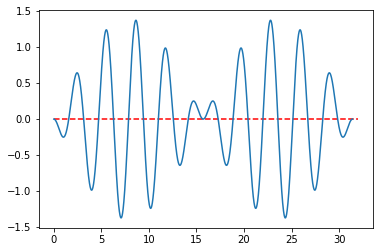

In [41]:
# 2.2 进行模拟与近似
w0 = 2
w1 = 1.6

y = 2 * np.sin((w1 - w0)*t/2) / (w0*w0 - w1*w1) * np.sin(w0 * t)
plt.plot(t, y)
plt.hlines(0, 0, 32, colors = "r", linestyles = "dashed")

# 当 w1 -> w0 时，就是共振，也即：大的周期越来越大，内部的振幅也就是越来越大，而不是像现在这样大的有两个周期


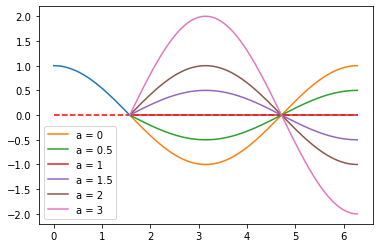

In [47]:
# 3. 单位力，在 t = pi/2 时刻，击打小球

hit = 1 / 2 * np.pi

# 击打之前
t1 = np.linspace(0, hit, 32, endpoint=True)
y1 = np.cos(t1)
plt.plot(t1, y1)

# 击打之后
t2 = np.linspace(hit, 2 * np.pi, 256, endpoint=True)
# 不同的力度，对应不同的振幅；如果力度刚好是 1，那么可以让小球静止；
forces = [0, 0.5, 1, 1.5, 2, 3]
for a in forces:
    y2 = (1 - a) * np.cos(t2)
    msg = 'a = {}'.format(a)
    plt.plot(t2, y2, label=msg)

plt.legend()
plt.hlines(0, 0, 6.3, colors="r", linestyles="dashed")

In [49]:
from scipy import linalg, sparse

In [52]:
# 4. 二元一阶微分方程

# 4.1 言情剧中的无限编排，因为是循环的 
# 行向量
a = np.array([[1,2], [-1,-1]])
a
eigVals, eigVects = linalg.eig(a)

eigVals

# 列向量对应的是特征向量，并且是单位化后的
eigVects

array([9.71445147e-17+1.j, 9.71445147e-17-1.j])

array([[ 0.81649658+0.j        ,  0.81649658-0.j        ],
       [-0.40824829+0.40824829j, -0.40824829-0.40824829j]])

<Figure size 432x288 with 0 Axes>

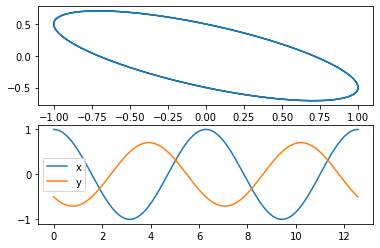

In [55]:
plt.figure() 

# 时间
t = np.linspace(0, 4 * np.pi, 512, endpoint=True)

# x 与 y 的关系
x = np.cos(t)
y = -1/2 * (np.cos(t) + np.sin(t))
plt.subplot(211)
plt.plot(x, y)


# 与 t 关系
plt.subplot(212)
plt.plot(t, x, label="x")
plt.plot(t, y, label="y")

plt.legend()
plt.show()

In [58]:
# 4.2 sink
# 行向量
a = np.array([[-1,2], [0, -3]])
a
eigVals, eigVects = linalg.eig(a)

eigVals
eigVects


array([[-1,  2],
       [ 0, -3]])

array([-1.+0.j, -3.+0.j])

array([[ 1.        , -0.70710678],
       [ 0.        ,  0.70710678]])

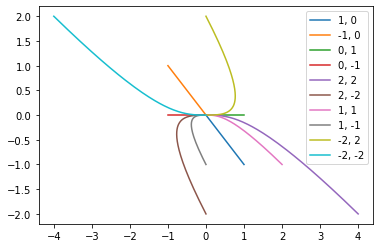

In [69]:
t = np.linspace(0, 4 * np.pi, 512, endpoint=True)

for c1, c2 in zip([1, -1, 0, 0, 2, 2, 1, 1, -2, -2],
                  [0, 0, 1, -1, 2, -2, 1, -1, 2, -2]):
    x = c1 * np.exp(-3 * t) + c2 * np.exp(-1 * t)
    y = -1 * c1 * np.exp(-3 * t)

    msg = '{}, {}'.format(c1, c2)

    plt.plot(x, y, label=msg)

plt.legend()

In [70]:
a = np.array([[-2,2], [2, -5]])
a
eigVals, eigVects = linalg.eig(a)

eigVals

# 列向量对应的是特征值的特征向量，并且是单位化的
eigVects

array([[-2,  2],
       [ 2, -5]])

array([-1.+0.j, -6.+0.j])

array([[ 0.89442719, -0.4472136 ],
       [ 0.4472136 ,  0.89442719]])

In [71]:
# (2,1) 是 -1 对应的 特征向量，单位化后（这里是按行单位化），和 eig 返回的第一列是一样的
x = np.array([[2,1], [1, -2]])
x

y=np.linalg.norm(x, axis=1, keepdims=True)
y

z=x/y
z

array([[ 2,  1],
       [ 1, -2]])

array([[2.23606798],
       [2.23606798]])

array([[ 0.89442719,  0.4472136 ],
       [ 0.4472136 , -0.89442719]])

In [72]:
linalg.eig?

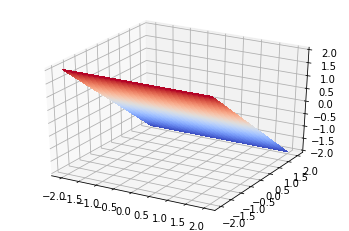

In [29]:
# 2. 曲面

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-2, 2, 200, endpoint = True)
y = np.linspace(-2, 2, 200, endpoint = True)
x, y = np.meshgrid(x, y)

z = -y
# z = 1 - x**2 - y **2 
# z = x**2 - y **2 


ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=2, antialiased=False)

